## <center>5. Feladatsor</center>

### <center>Gauss-féle normálegyenletek</center>

<b>1.feladat.</b> Adjuk meg a megadott $(t_i, f_i)$ 


  <tr>
<td>t_i | -2 | -1 | 1 | 2 </td>
  </tr>
  <br>
  <tr>
    <td>f_i | 3 | 1 | 0 | 2   </td>
  </tr>

pontokat négyzetesen legjobban közelítő
<br>

+ egyenest (lineáris regresszió): $F(t)=x_1+x_2t$
+ parabolát: $F(t)=x_1+x_2t+x_3t^2$

<br>
a Gauss-féle normálegyenlet segítségével! Az adatokat, a közelítő egyenest és parabolát egy ábrán címkézve ábrzázoljuk! Továbbá számítsuk ki a maradékvektor euklideszi hosszának négyzetét, azaz a $J(x)=||Ax-f||_2^2$ értéket!<br>

In [1]:
%% Egyenes (Linearis regresszio)
t = [-2 -1 1 2];
f = [3 1 0 2];

% A levezetett M*x=f_hullam LAER
M = [length(t) sum(t); sum(t) sum(t.^2)];
f_hullam = [sum(f) t*f']';

% A megoldas x=(x_1 x_2)^T
x = M\f_hullam

x =

   1.50000
  -0.30000



In [2]:
%% Egyenes (Linearis regresszio)
t = [-2 -1 1 2];
f = [3 1 0 2];
A = [ones(length(t),1) t']

% A Gauss-fele normalegyenlet A^TAx=A^Tf megoldasa x = (A^TA)\(A^Tf) 
x = (A'*A)\(A'*f')

A =

   1  -2
   1  -1
   1   1
   1   2

x =

   1.50000
  -0.30000



In [3]:
%% Parabola
t = [-2 -1 1 2];
f = [3 1 0 2];
A = [ones(length(t),1) t' (t.^2)']

% A Gauss-fele normalegyenlet A^TAx=A^Tf megoldasa x = (A^TA)\(A^Tf) 
x = (A'*A)\(A'*f')

A =

   1  -2   4
   1  -1   1
   1   1   1
   1   2   4

x =

  -0.16667
  -0.30000
   0.66667



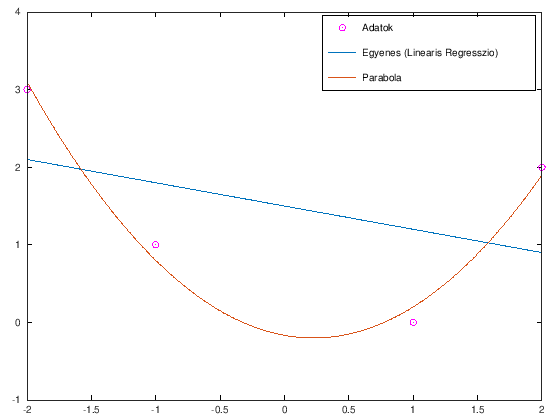

In [4]:
%% Minden egyben abraval egyutt
t = [-2 -1 1 2];
f = [3 1 0 2];
A_linreg = [ones(length(t),1) t'];
A_parabola = [ones(length(t),1) t' (t.^2)'];

% A Gauss-fele normalegyenlet A^TAx=A^Tf megoldasa x = (A^TA)\(A^Tf) 
x_linreg = (A_linreg'*A_linreg)\(A_linreg'*f');
x_parabola = (A_parabola'*A_parabola)\(A_parabola'*f');

%% Abrazolas
tt = t(1):0.01:t(end); % idopontok finom felosztasa 
%plot(t,f,'mo',tt,x_linreg(1)+x_linreg(2)*tt,tt,x_parabola(1)+x_parabola(2)*tt+x_parabola(3)*tt.^2)

%% polyval es a flip paraccsal minden kompaktul
plot(t,f,'mo',tt,polyval(flip(x_linreg),tt),tt,polyval(flip(x_parabola),tt))
legend('Adatok','Egyenes (Linearis Regresszio)','Parabola')

In [5]:
%% J(x) maradek vektor szamítasa
J_linreg = norm(A_linreg*x_linreg-f',2)^2
J_parabola = norm(A_parabola*x_parabola-f',2)^2

J_linreg =  4.1000
J_parabola =  0.10000


<br>
<b>2.feladat.</b> Írjunk programot <i>legkisebbnegyzetek.m</i> néven, amely megadja a megadott $(t_i, f_i)$ pontokat négyzetesen legjobban közelítõ $n$-edfokú polinom együtthatóit a Gauss-féle normálegyenlet segítségével és kiszámítja a maradékvektor euklideszi hosszának négyzetét!

<br> Alkalmazzuk a programunkat az előző feladatra!

In [6]:
t = [-2 -1 1 2];
f = [3 1 0 2];
[x,Jnorma]=legkisebbnegyzetek(t,f,1)

x =

   1.50000
  -0.30000

Jnorma =  4.1000


In [7]:
t = [-2 -1 1 2];
f = [3 1 0 2];
[x,Jnorma]=legkisebbnegyzetek(t,f,2)

x =

  -0.16667
  -0.30000
   0.66667

Jnorma =  0.10000


<br>
<b>3.feladat.</b> Beépített függvények segítségével írjunk egy általános eljárást, mely ábrázolja a közelítő polinomot az adatokkal együtt. Alkalmazzuk ezt az <b>1.feladat.</b> adataira!

P =

  -0.30000   1.50000



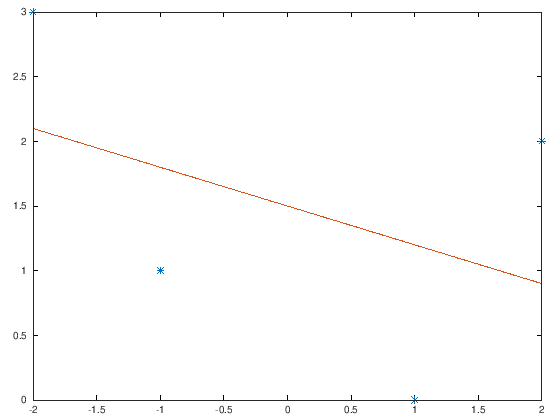

In [8]:
t = [-2 -1 1 2];
f = [3 1 0 2];

P = polyfit(t,f,1) 
tt = t(1):0.01:t(end);
%% tt = linspace(t(1),t(end), 256) alternativa

linreg=polyval(P,tt);
plot(t,f,'*',tt,linreg)

P =

   0.66667  -0.30000  -0.16667



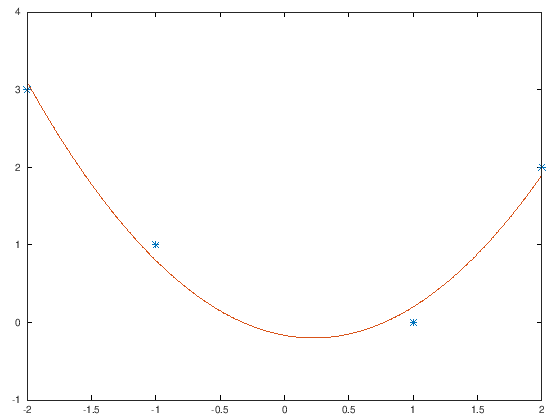

In [9]:
t = [-2 -1 1 2];
f = [3 1 0 2];

P = polyfit(t,f,2) 
tt = t(1):0.01:t(end);
%% tt = linspace(t(1),t(end), 256) alternativa

parabola=polyval(P,tt);
plot(t,f,'*',tt,parabola)

<br>
<b>4.feladat.</b> Adjuk meg a megadott $(t_i,f_i)$

  <tr>
<td>t_i | -20 | -1 | 1 | 12 </td>
  </tr>
  <br>
  <tr>
    <td>f_i | -11 | 1 | 0 | 2   </td>
  </tr>

pontokat négyzetesen legjobban közelítő
<br>

$$F(t)=\frac{x_1}{t}+x_2\sin^2\left(\frac{\pi t}{2}\right)$$

<br>
a Gauss-féle normálegyenlet segítségével! Az adatokat és a folyamatmodellt egy ábrán címkézve ábrzázoljuk! Számítsuk ki a maradékvektor euklideszi hosszának négyzetét!<br>

x =

  -0.14100
   0.50000

J =  125.46


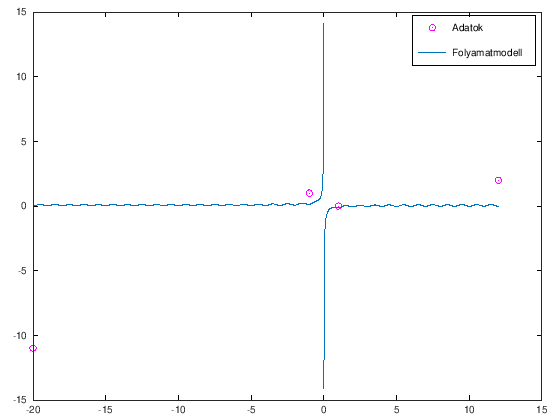

In [10]:
%% Minden egyben abraval egyutt
t = [-20 -1 1 12];
f = [-11 1 0 2];
A = [1./t' ((sin((pi*t)/2)).^2)'];

% A Gauss-fele normalegyenlet A^TAx=A^Tf megoldasa x = (A^TA)\(A^Tf) 
x = (A'*A)\(A'*f')

%% Abrazolas
tt = t(1):0.01:t(end); % idopontok finom felosztasa 
plot(t,f,'mo',tt,x(1)./tt+x(2)*(sin(pi*tt)/2).^2)
legend('Adatok','Folyamatmodell')

J = norm(A*x-f',2)^2

<br>
<b>5.feladat.</b> Tekintsük Debrecen városának havi középhőmérséklet adatait 1901-2019 között az Országos Meteorológiai Szolgálat honalpja alapján.

A <a href="https://www.met.hu/eghajlat/magyarorszag_eghajlata/eghajlati_adatsorok/Debrecen/adatok/havi_adatok/">nyers adatok</a>.

Származtassuk az adatbázis alapján az adott hónapra a teljes időtartamra vonatkozó átlagos havi középhőmérsékletet. A mérési napok a teljes év során legyenek

$$15,\ 46,\ 74,\ 105,\ 135,\ 166,\ 196,\ 227,\ 258,\ 288,\ 319,\ 349.$$

Az adatokra illesszük az alábbi

$$F(t)=x_1+x_2\cos\left(2\pi\frac{t-14}{365}\right)$$

folyamatmodellt! Ábrázoljuk az adatokat és a folyamatmodell egy ábrán, valamint számítsuk ki a maradékvektor euklideszi hosszának négyzetét!

In [11]:
[a] = textread ('DE_M_ta.txt', "%s ",10) % az elso 10 sor beolvasasa

a = 
{
  [1,1] = #datum;m_ta;m_tax;m_taxd;m_tan;m_tand
  [2,1] = 1901-01;-7.6;1.8;1901-01-28;-18.6;1901-01-09
  [3,1] = 1901-02;-4.3;2.9;1901-02-06;-11.2;1901-02-16
  [4,1] = 1901-03;5.8;14.3;1901-03-20;-0.3;1901-03-01
  [5,1] = 1901-04;10.3;19.2;1901-04-10;4.4;1901-04-19
  [6,1] = 1901-05;16.1;22.5;1901-05-26;8.9;1901-05-05
  [7,1] = 1901-06;20.4;26.0;1901-06-25;13.4;1901-06-17
  [8,1] = 1901-07;22.0;28.0;1901-07-30;16.7;1901-07-10
  [9,1] = 1901-08;19.7;25.8;1901-08-01;11.9;1901-08-30
  [10,1] = 1901-09;14.8;19.7;1901-09-23;9.1;1901-09-08
}


In [12]:
fid = fopen('DE_M_ta.txt', 'rt');
tline = fgetl(fid);
headers = strsplit(tline, ';');     %a cell array of strings
datacell = textscan(fid, '%f', 'Delimiter',';', 'CollectOutput', 6);
fclose(fid);
datavalues = datacell{1};    %as a numeric array

In [13]:
%% A megfelelo havi kozephomerseklet adatok 1901.januar es 2019.december kozott 
for j=1:1428
    evi(j)=datavalues(3+(j-1)*11);
end
evi';
evi(1:13)

ans =

 Columns 1 through 7:

   -7.60000   -4.30000    5.80000   10.30000   16.10000   20.40000   22.00000

 Columns 8 through 13:

   19.70000   14.80000   11.60000    3.10000    3.80000    0.70000



In [14]:
1428/12
HEM = reshape(evi,12,119) %HEM=HaviEvesMatrix
                          %Sor az aktualis honap, az oszlop az aktualis ev

ans =  119
HEM =

 Columns 1 through 7:

   -7.60000    0.70000   -2.10000   -3.10000   -7.40000   -2.90000   -5.20000
   -4.30000    2.80000    2.10000    2.50000   -0.50000    1.00000   -5.20000
    5.80000    3.70000    7.00000    4.80000    5.40000    4.90000   -0.10000
   10.30000    8.70000    8.30000   10.20000    8.40000   11.60000    8.10000
   16.10000   11.80000   15.00000   14.40000   15.40000   17.20000   17.90000
   20.40000   18.30000   17.70000   18.80000   20.10000   19.10000   19.00000
   22.00000   19.20000   20.00000   21.90000   22.10000   21.00000   19.30000
   19.70000   20.20000   18.90000   20.20000   21.50000   19.00000   19.20000
   14.80000   14.70000   16.00000   14.60000   16.40000   13.80000   14.30000
   11.60000   10.00000   10.70000   10.40000    6.30000    8.80000   13.00000
    3.10000   -1.10000    5.20000    1.80000    6.50000    6.90000    3.20000
    3.80000   -7.20000    1.50000   -0.50000   -0.90000   -2.10000    0.90000

 Columns 8 through 14:

   21.80000   21.70000   22.60000   19.40000   19.70000   18.80000   22.50000
   20.20000   20.50000   20.20000   19.50000   19.80000   22.00000   21.40000
   15.90000   16.20000   14.20000   14.30000   17.40000   15.40000   17.40000
   10.40000   10.80000    9.30000   12.10000   12.70000   10.50000    9.80000
    6.00000    6.00000    5.20000    7.40000    6.40000    7.00000    8.80000
   -0.40000    3.10000    4.20000    4.50000   -1.10000   -3.20000   -4.60000

 Columns 64 through 70:

  -10.00000   -0.50000   -4.50000   -4.20000   -3.80000   -4.70000   -1.00000
   -3.00000   -4.70000    4.70000   -0.50000    2.60000    0.20000   -0.80000
    2.20000    4.90000    4.80000    6.40000    5.20000    3.20000    4.20000
   11.00000    9.00000   12.60000   10.30000   12.80000    9.40000   10.30000
   14.60000   13.90000   15.50000   16.00000   16.90000   17.70000   13.90000
   22.50000   18.40000   18.30000   18.60000   20.60000   17.90000   18.90000
   21.30000   19.60000   20.10000   22

error: 'label' undefined near line 1 column 1


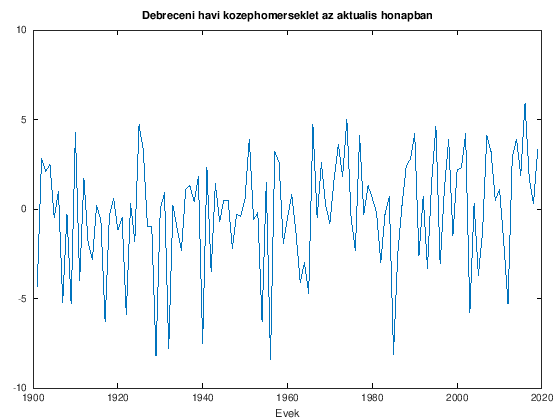

In [15]:
plot(1901:2019,HEM(2,:))
title('Debreceni havi kozephomerseklet az aktualis honapban')
xlabel('Evek')
label('Homerseklet')

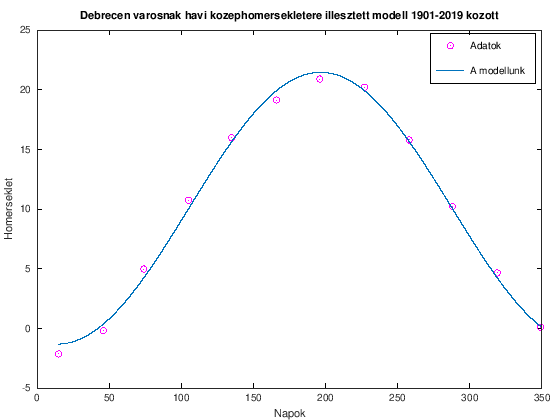

In [16]:
t = [15 46 74 105 135 166 196 227 258 288 319 349]; % Az OMSZ adatbazisban nem volt, ezert havi 
% kozepso ertekeket adtunk meg a mereshez
f = (sum(HEM,2)/119);
f = f';

%% A modell F(t) = x_1 + x_2cos(2*pi(t-14)/365)

A = [ones(length(t),1) cos(2*pi*((t-14)/365))'];

% A Gauss-fele normalegyenlet A^TAx=A^Tf megoldasa x = (A^TA)\(A^Tf) 
x = (A'*A)\(A'*f');

%% Abrazolas
tt = t(1):0.01:t(end); % idopontok finom felosztasa 
%plot(t,f,'mo',tt,x_linreg(1)+x_linreg(2)*tt,tt,x_parabola(1)+x_parabola(2)*tt+x_parabola(3)*tt.^2)

%% polyval es a flip paraccsal minden kompaktul
plot(t,f,'mo',tt,x(1)+x(2)*cos(2*pi*(tt-14)/365))
legend('Adatok','A modellunk')
title('Debrecen varosnak havi kozephomersekletere illesztett modell 1901-2019 kozott')
xlabel('Napok')
ylabel('Homerseklet')

In [17]:
J = norm(A*x-f',2)^2

J =  3.4028
